In [1]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Dataset configuration
dataset_path = r'C:\Users\CHAMA COMPUTERS\Documents\Research\Datasets\data_454'  # Parent directory
train_folder = os.path.join(dataset_path, 'train')  # Training data path
valid_folder = os.path.join(dataset_path, 'valid')  # Validation data path

img_size = (80, 80)  # Target image dimensions (height, width)
num_classes = 454  # Number of character classes
batch_size = 64  # Samples per training batch
epochs = 100  # Training iterations

In [3]:
# Function to load and preprocess dataset
def load_data(folder_path):
    """Load and preprocess images from directory structure.
    
    Args:
        dataset_path: Path to directory containing class folders
    Returns:
        Tuple of (images, labels) as numpy arrays
    """
    images = []
    labels = []

    # Iterate through class folders (1-50)
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            # Convert folder name to 0-indexed label
            label = int(class_folder) - 1
            # Process each image in class folder
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                # Load and preprocess image
                img = image.load_img(img_path, 
                                   target_size=img_size, 
                                   color_mode="grayscale")
                img = image.img_to_array(img) / 255.0  # Normalize to [0,1]
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

In [4]:
# Load and prepare dataset
print("Loading training data...")
X_train, y_train = load_data(train_folder)
print("Loading validation data...")
X_val, y_val = load_data(valid_folder)

Loading training data...
Loading validation data...


In [5]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

In [6]:
# Model architecture definition CNN
def create_cnn_model(input_shape, num_classes):
    """Create CNN model for character classification.
    
    Architecture:
        - 3 Convolutional layers with increasing filters
        - MaxPooling after each Conv layer
        - Dropout for regularization
        - Fully connected layers at end
    """
    model = Sequential([
        # First convolutional block
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Dropout(0.2),

        # Second convolutional block
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.2),

        # Third convolutional block
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        # Classification layers
        Flatten(),  # Convert 3D features to 1D vector
        Dense(256, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    return model

In [7]:
# Model Configuration
input_shape = (80, 80, 1)
model = create_cnn_model(input_shape, num_classes)

# Compile model with optimizer and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model architecture
print("\nModel Summary:")
model.summary()


Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 39, 39, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 18, 

In [8]:
# Train the Model
print("\nTraining model...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)


Training model...
Epoch 1/100
1362/1362 [==============================] - 148s 108ms/step - loss: 4.8935 - accuracy: 0.0773 - val_loss: 3.0477 - val_accuracy: 0.3253
Epoch 2/100
1362/1362 [==============================] - 135s 99ms/step - loss: 2.9668 - accuracy: 0.3018 - val_loss: 1.7861 - val_accuracy: 0.5736
Epoch 3/100
1362/1362 [==============================] - 133s 97ms/step - loss: 2.1536 - accuracy: 0.4482 - val_loss: 1.2579 - val_accuracy: 0.6975
Epoch 4/100
1362/1362 [==============================] - 133s 98ms/step - loss: 1.7409 - accuracy: 0.5352 - val_loss: 0.9602 - val_accuracy: 0.7685
Epoch 5/100
1362/1362 [==============================] - 133s 97ms/step - loss: 1.4974 - accuracy: 0.5904 - val_loss: 0.8078 - val_accuracy: 0.8063
Epoch 6/100
1362/1362 [==============================] - 133s 98ms/step - loss: 1.3207 - accuracy: 0.6313 - val_loss: 0.6932 - val_accuracy: 0.8299
Epoch 7/100
1362/1362 [==============================] - 133s 98ms/step - loss: 1.1832 - acc

In [9]:
# Save trained model
model.save(r'C:\Users\CHAMA COMPUTERS\Documents\Research\Models\sinhala_character_model_v4.h5')
print("Model saved successfully!")

Model saved successfully!


In [10]:
# Visualization function
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


Generating training graphs...


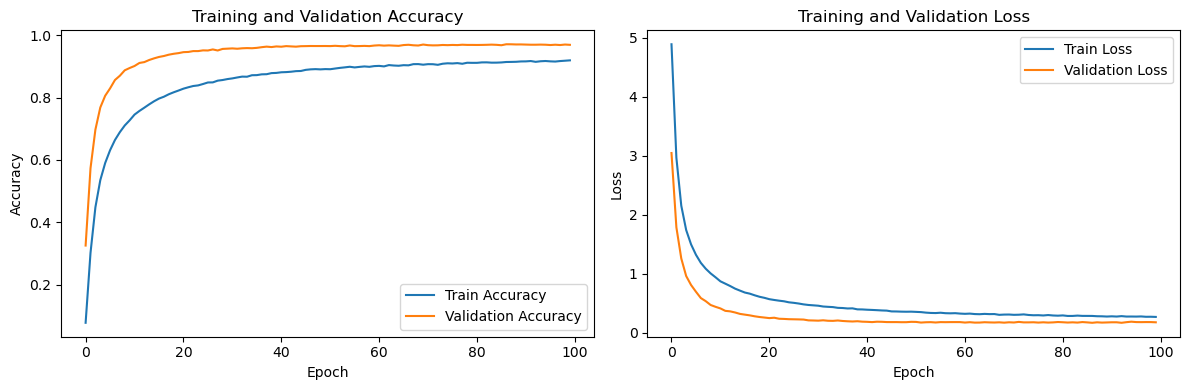

In [11]:
# Display training curves
print("\nGenerating training graphs...")
plot_training_history(history)

In [12]:
# Final evaluation including training metrics
print("\nFinal Evaluation:")

# Get final epoch training metrics from history
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)

print(f"Training Accuracy:   {train_acc*100:.2f}%")
print(f"Validation Accuracy: {val_acc*100:.2f}%")
print(f"\nTraining Loss:   {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


Final Evaluation:
Training Accuracy:   99.95%
Validation Accuracy: 96.97%

Training Loss:   0.0046
Validation Loss: 0.1746
